## Optimal number of clusters: Silhouette (BaskinRobbins dataset)
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/
* sklearn example: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

---

* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* Chulalongkorn Business School, Thailand

---

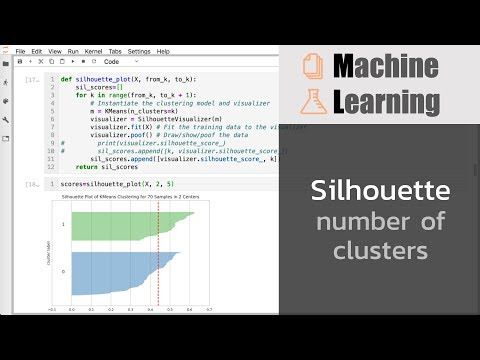

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ritq16Iw7XQ', width=720, height=405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.3.4
numpy   version = 1.20.3
seaborn version = 0.11.2


In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv')
df.sample(5)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
49,Pumpkin Cheesecake,160,7.0,0.3,21,17,3.0
66,Watermelon Splash,120,0.5,0.0,27,20,0.1
5,Blueberry Cheesecake,150,8.0,0.3,18,14,3.0
8,NSA Caramel Turtle Truffle,200,8.0,0.2,38,7,5.0
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


# Scikit-learn: KMeans Clustering
1. [Scale data](#1.-scale-data)
1. Optimal number of clusters
    1. [Silhouette analysis](#2.-Silhouette-analysis)
        1. [visualize silhouette](#visualize-silhouette)
    1. [Elbow method](#elbow-method)
1. [Compute and name clusters](#3.-Compute-and-name-clusters)

In [5]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

## 1. scale data

In [6]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [7]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

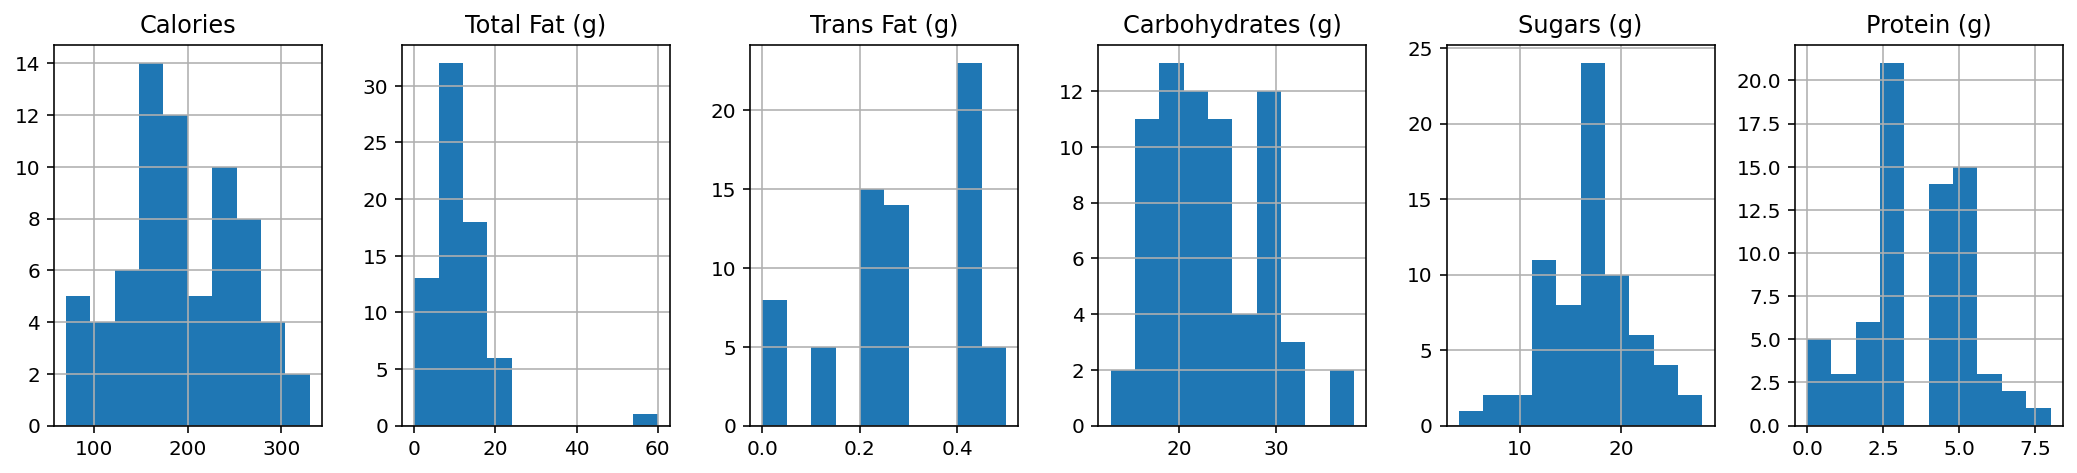

In [8]:
df[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

In [9]:
## z-score
# scaler = preprocessing.StandardScaler() # create StandardScaler instance

# power transform
scaler = preprocessing.PowerTransformer(standardize=True)

S=scaler.fit_transform(df[cols]) # transform data
S[:5].round(4) # 2D numpy array

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [10]:
X=pd.DataFrame(S, columns=cols) ## z-score
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


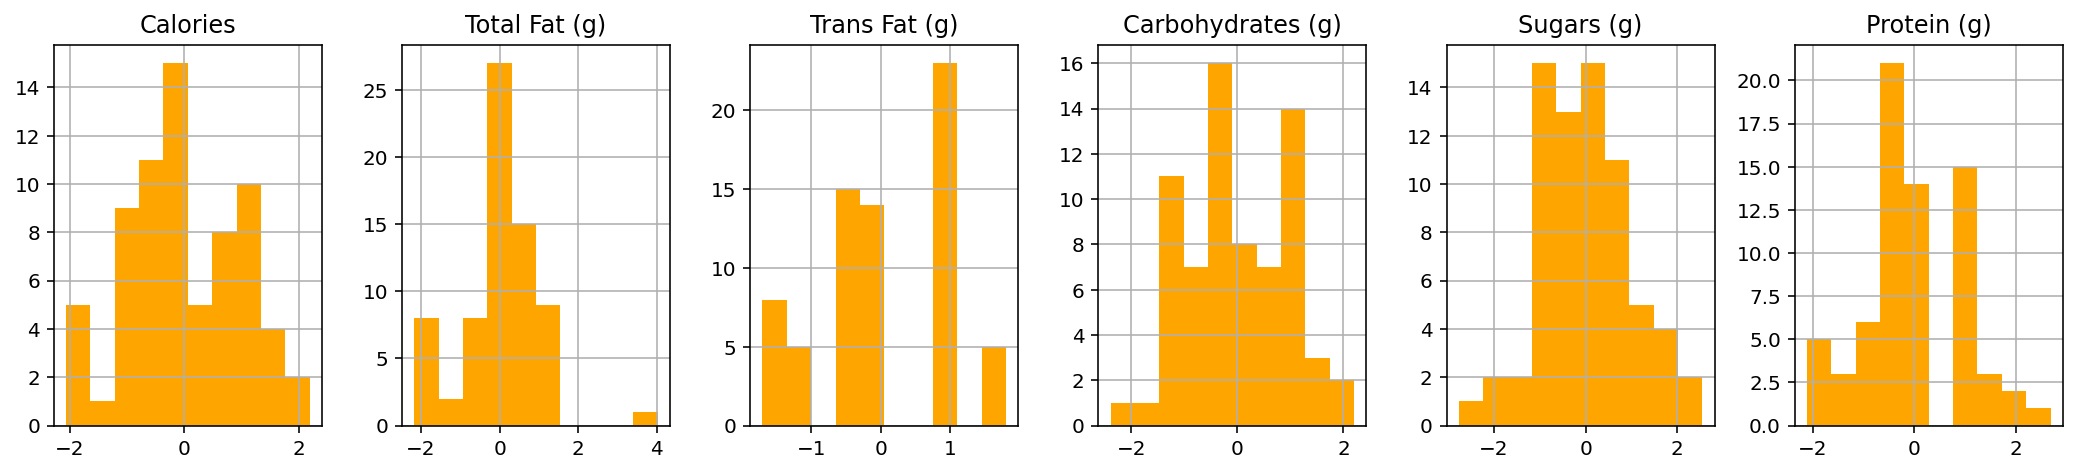

In [11]:
X[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange');

---

## 2. Silhouette analysis
* sklearn doc: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* yellowbrick doc: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer # Visualize Silhouette

In [13]:
def sil_score(X, from_k=2, to_k=6):
    '''
    calculate silhouette score for k clusters
    '''
    sils=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
#         Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, m.labels_)
#         print(sample_silhouette_values)
#     return max(sils)[1]
    return sils

In [14]:
ss=sil_score(X, 2, 5)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')
# ค่า silhouette score ยิ่งสูงยิ่งดี
# [ค่า silhouette score, จน. cluster]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

scores = [[0.44, 2], [0.4282, 3], [0.3803, 4], [0.4074, 5]]
optimal number of clusters = 2


#### visualize silhouette

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


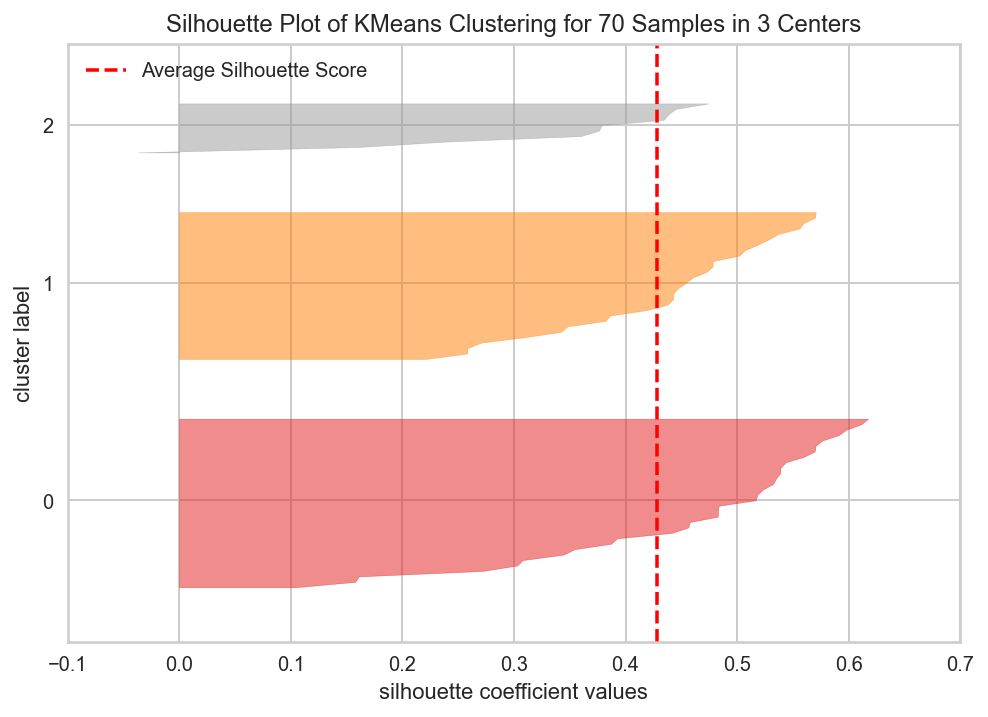

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 70 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [16]:
visualizer.silhouette_score_

0.42789606729873375

In [17]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


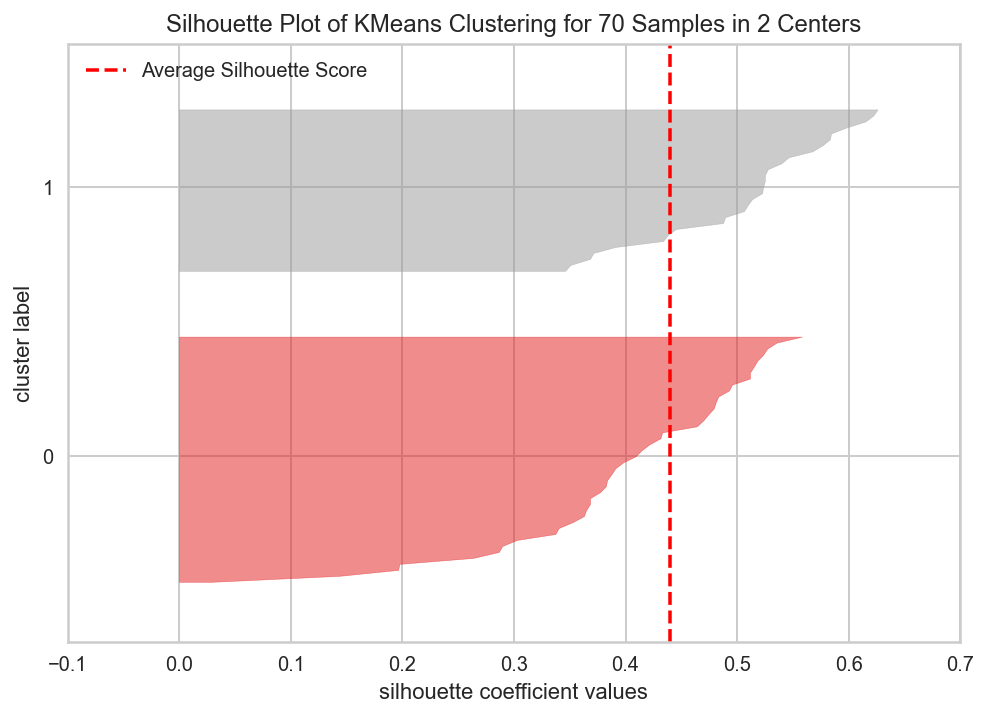

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


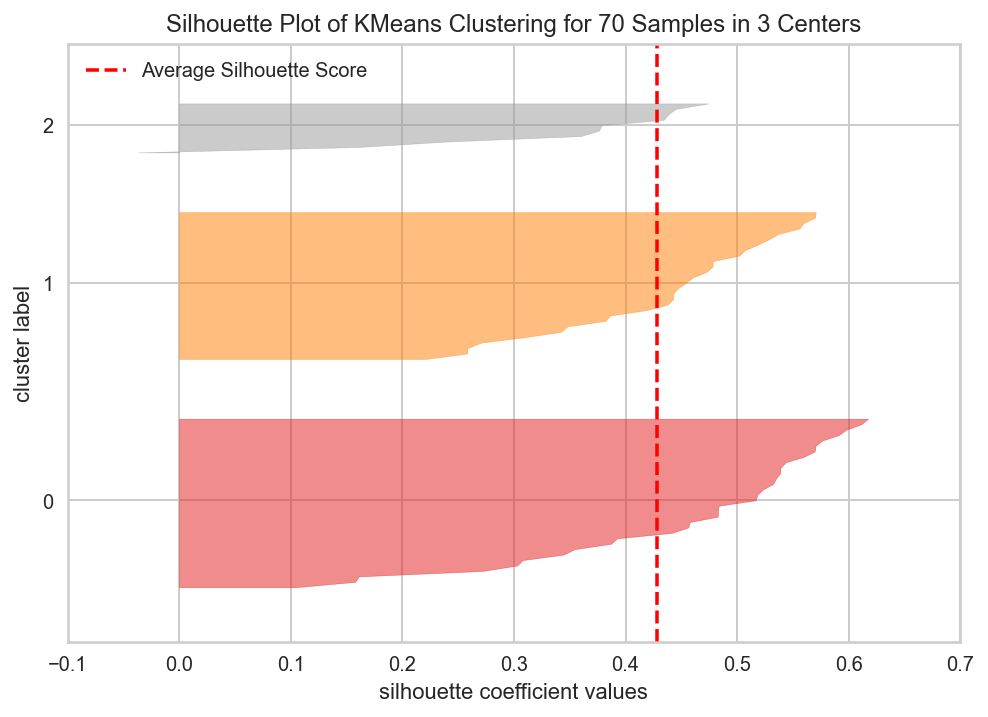

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


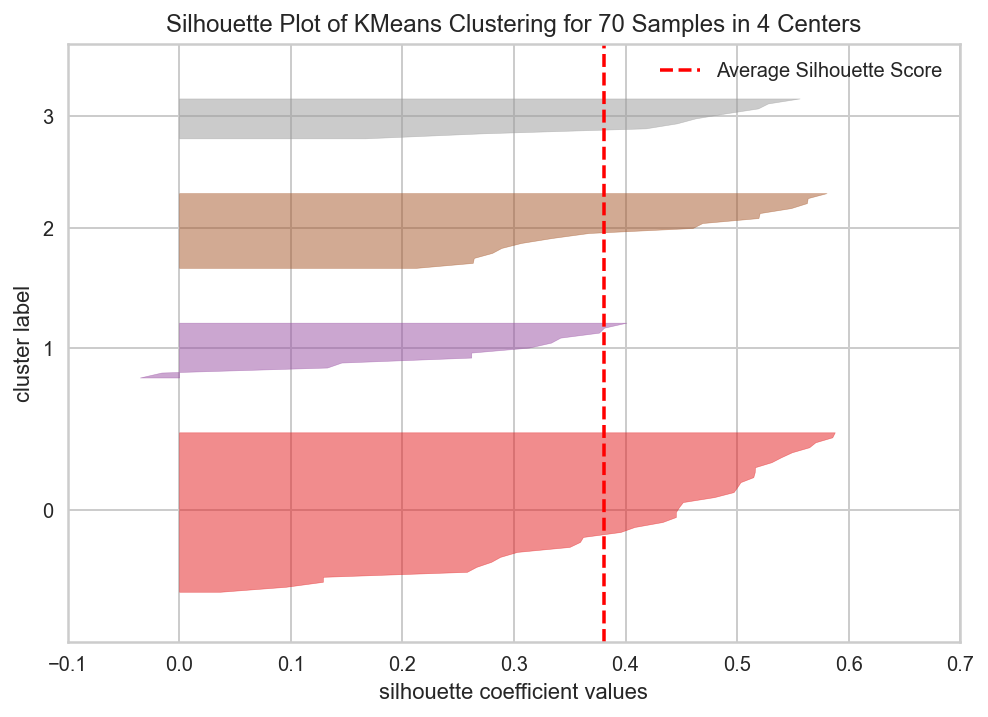

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


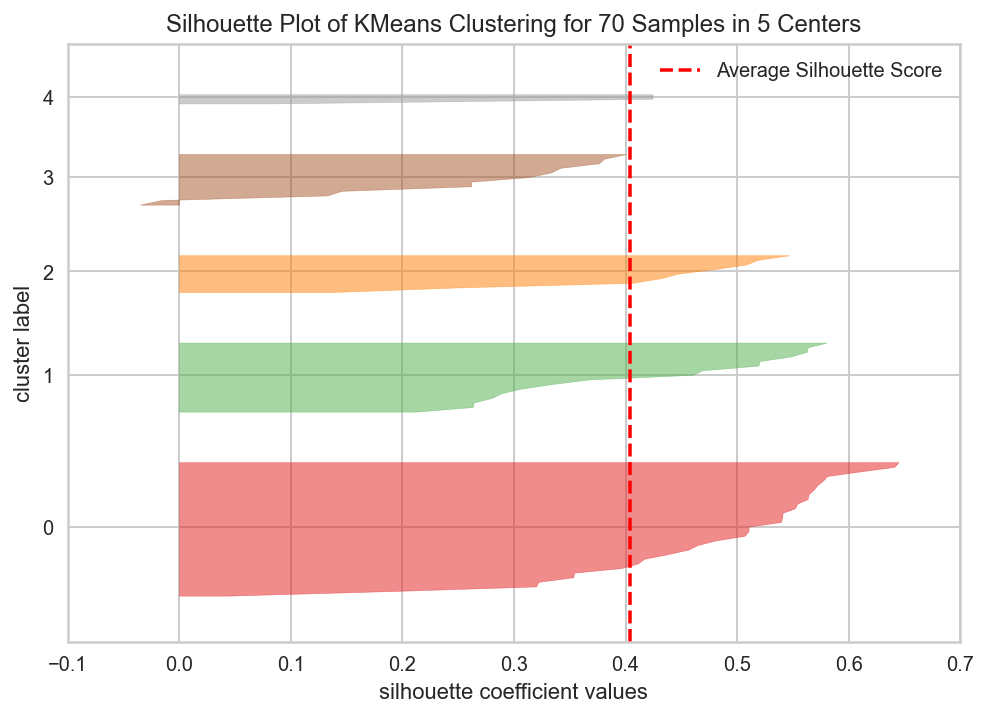

In [18]:
scores=silhouette_plot(X, 2, 5)

In [21]:
print(scores)

[[0.43997265572927813, 2], [0.42789606729873375, 3], [0.380336282442257, 4], [0.4043465886914011, 5]]


In [22]:
max(scores)[1]

2

### elbow method

In [23]:
def elbow_plot(X, from_k=2, to_k=5):
    '''
    plot elbow chart to help determining optimal number of clusters
    '''
    ssd=[]
    for k in range(from_k, to_k + 1):
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])
    dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
    dd['pct_chg']=dd['ssd'].pct_change() * 100
    plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
    # plt.plot(xy[:, 0], xy[:, 1], '--o')
    for index, row in dd.iterrows():
        plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=12)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

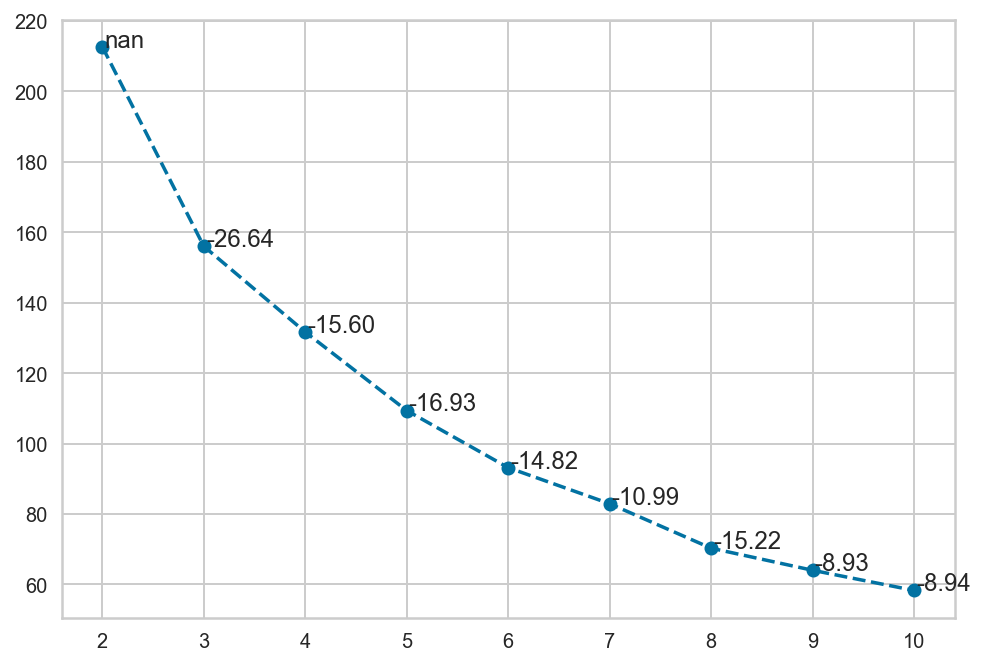

In [24]:
elbow_plot(X, 2, 10)

## 3. Compute and name clusters

In [25]:
model=KMeans(n_clusters=3)

In [26]:
model.fit(X)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
model.cluster_centers_.round(4)

array([[-1.5485, -1.8342, -1.605 , -0.33  , -0.2096, -1.425 ],
       [ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-0.4093, -0.1074, -0.324 , -0.5609, -0.6265, -0.2892]])

In [28]:
model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1])

In [29]:
df['cluster']=model.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,2
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


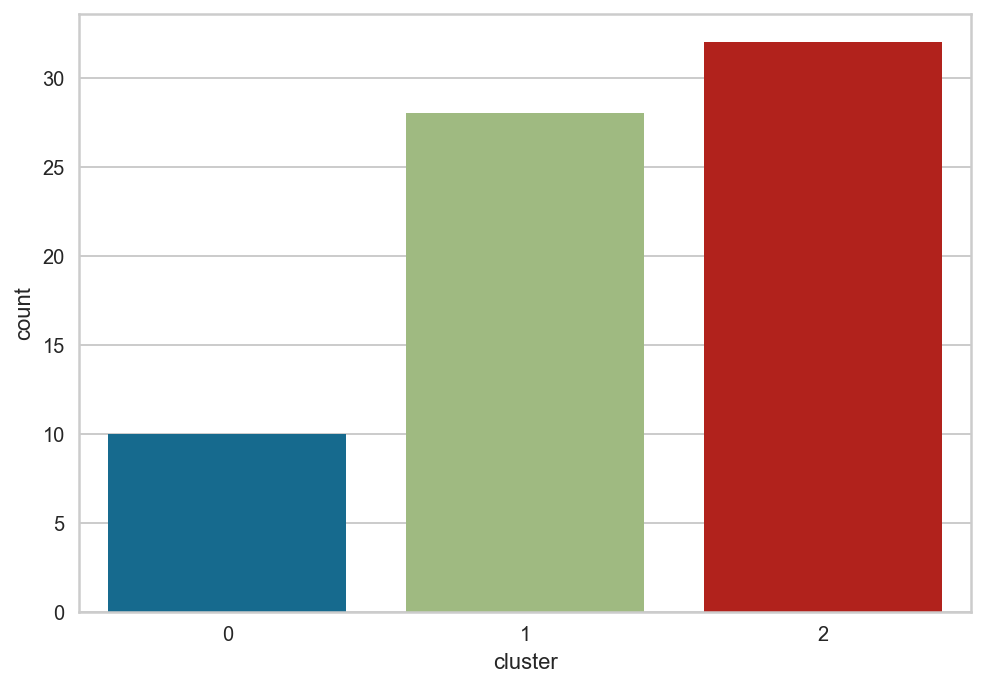

In [30]:
sns.countplot(x='cluster', data=df);

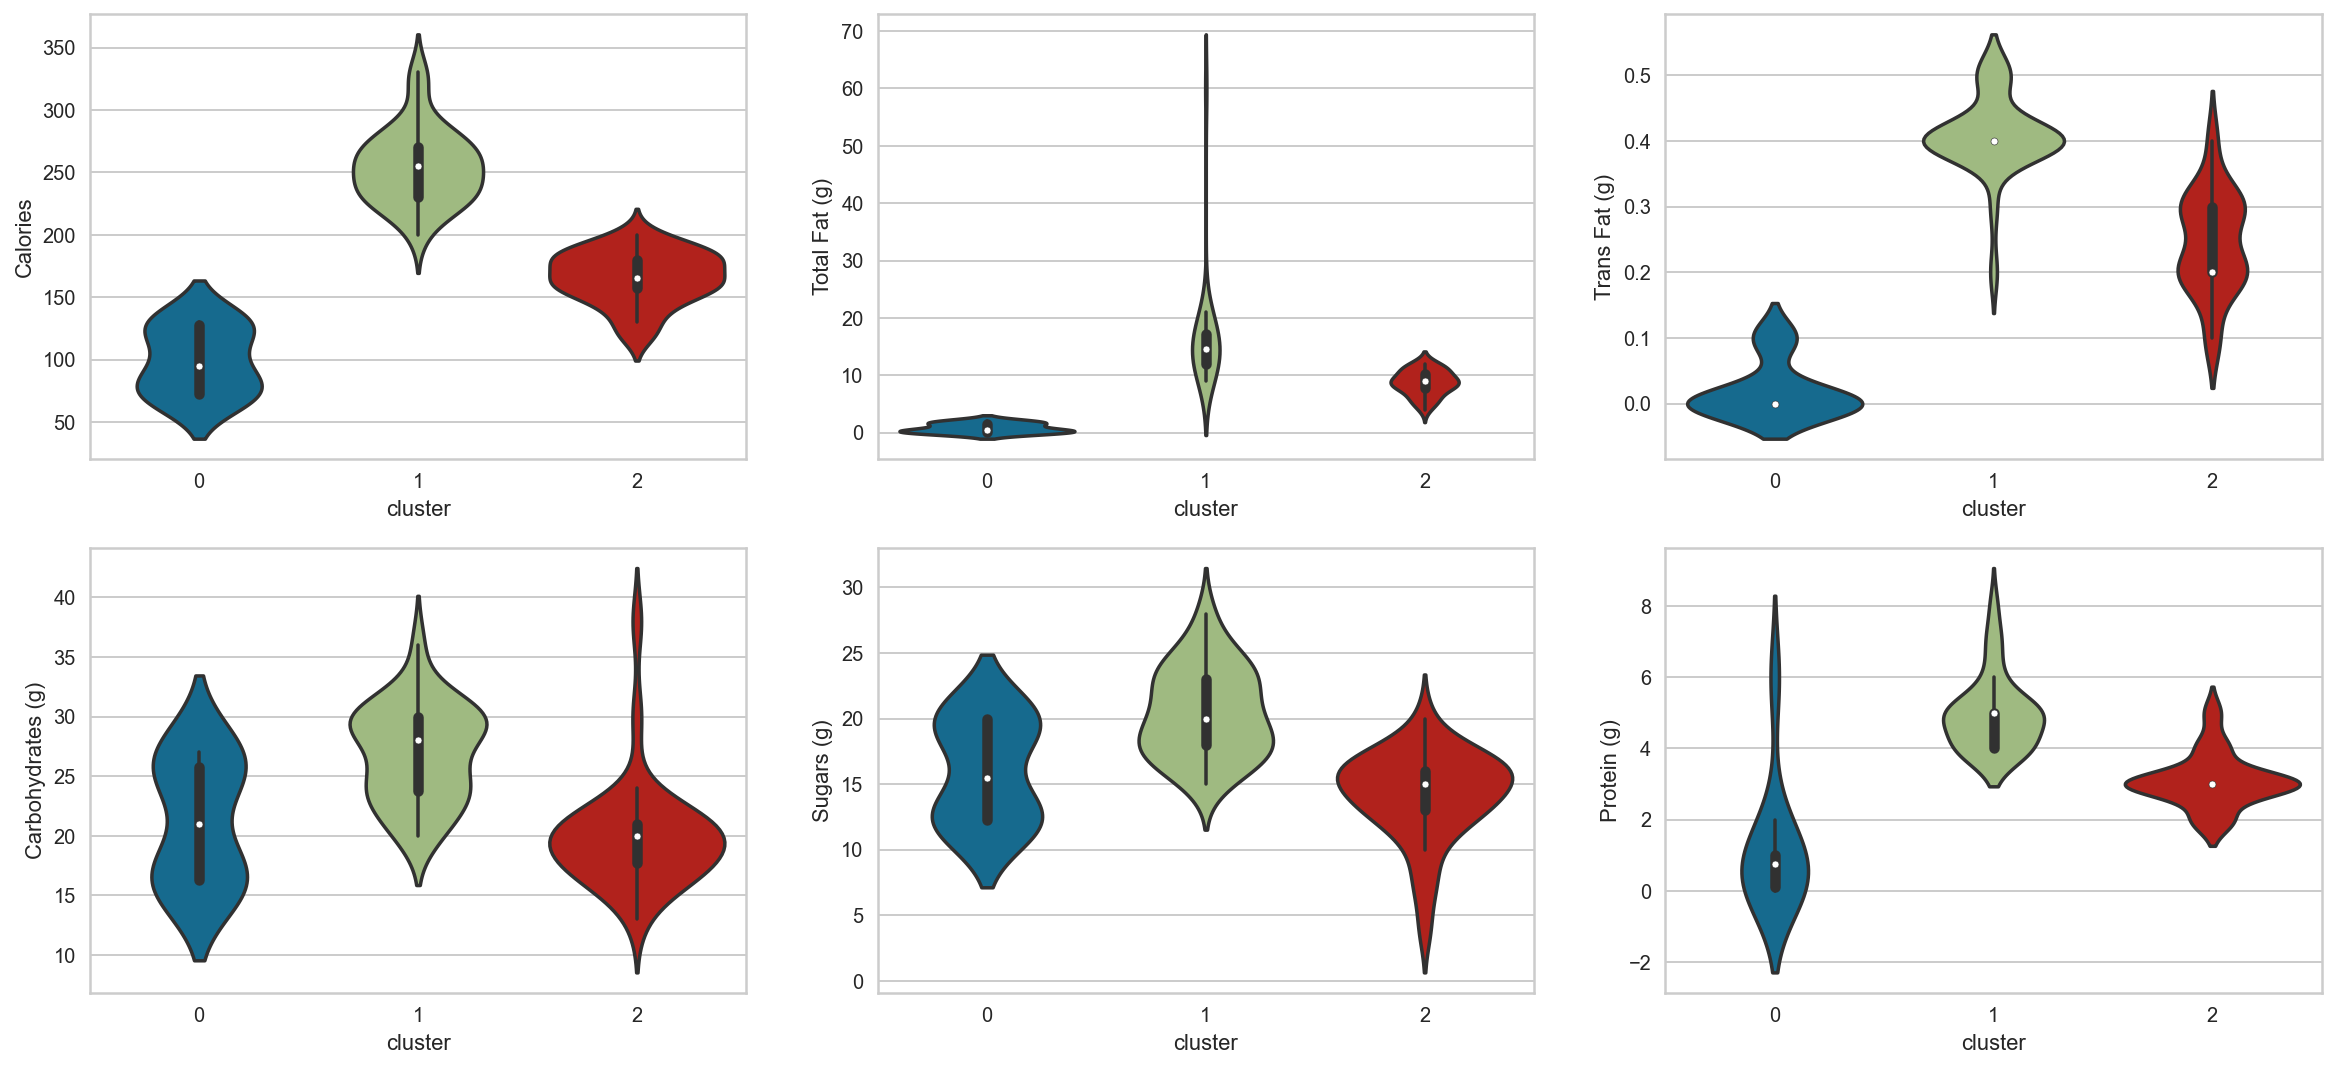

In [31]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

### scaled data (either z-score, power transform)

In [32]:
dx=X
dx['cluster']=model.labels_
dx.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,2
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,2
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,2
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,2
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,0


In [33]:
dx.groupby('cluster').median()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
cluster,,,,,,
0,-1.612508,-1.935544,-1.700508,-0.328836,-0.326237,-1.680032
1,1.029516,0.671798,0.857656,0.980131,0.686477,0.859598
2,-0.417082,-0.039724,-0.643961,-0.447402,-0.442092,-0.346462


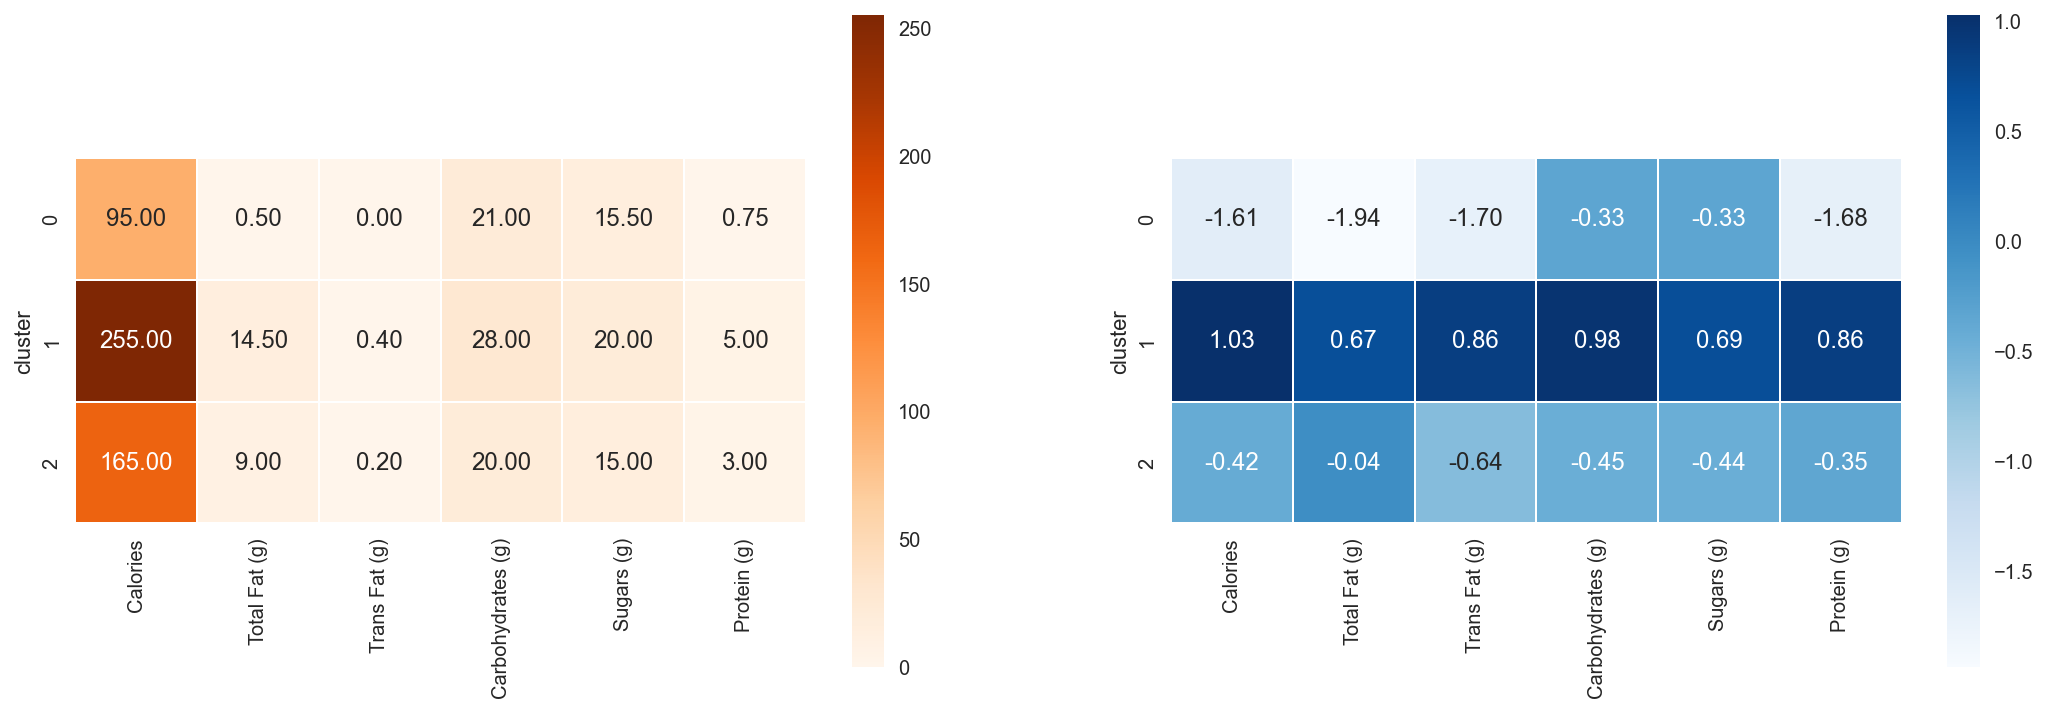

In [34]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(df[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1, 
            square=True, annot=True, fmt='.2f',ax=ax[0]); # ข้อมูลยังไม่ได้ rescale (หน่วยของเเต่ละตัวเเปรมันต่างกันมาก)
sns.heatmap(dx[cols].groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);# ข้อมูลยัง rescale เเล้ว (หน่วยของเเต่ละตัวเเปรถูก standardized)

In [35]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,0
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2


In [36]:
df[df.cluster==0]

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,0
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,0
50,Rainbow Sherbet,130,2.0,0.1,27,20,1.0,0
58,Splish Splash,70,0.5,0.0,16,12,0.5,0
60,Strawberry Sorbet,70,0.0,0.0,17,13,0.1,0
61,Trio De Janeiro,90,1.5,0.0,17,13,1.0,0
64,NF Vanilla Yogurt,130,0.4,0.0,25,20,6.0,0
66,Watermelon Splash,120,0.5,0.0,27,20,0.1,0
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0,0


In [37]:
# df.to_csv('BaskinRobbinsCluster.csv', index=False)